In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


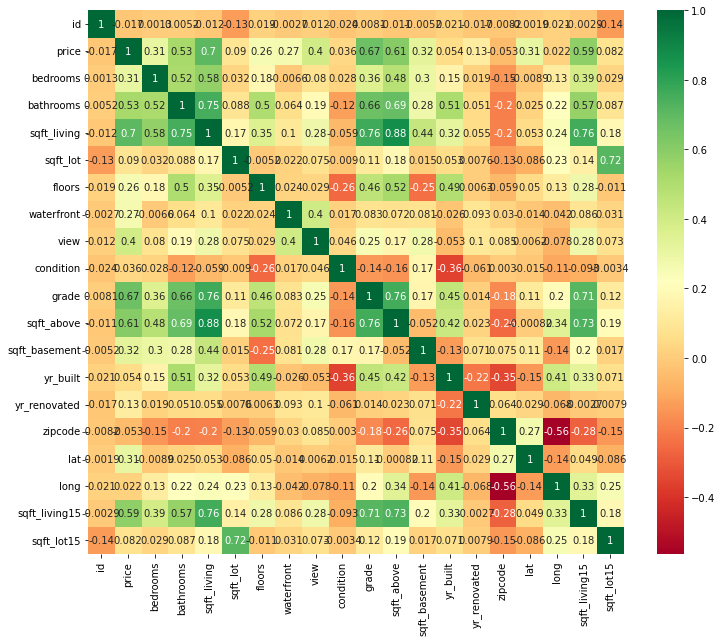

In [7]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# visulazation

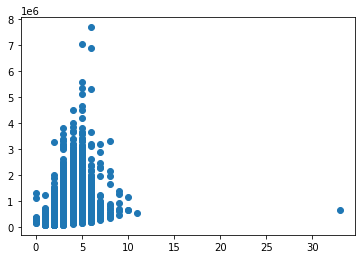

In [10]:
plt.scatter(df['bedrooms'],df['price'])

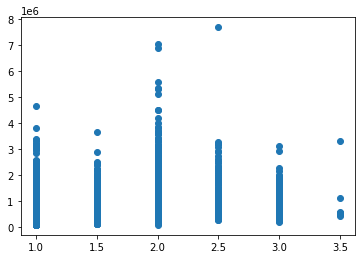

In [11]:
plt.scatter(df['floors'],df['price'])

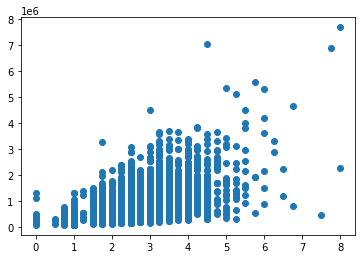

In [12]:
plt.scatter(df['bathrooms'],df['price'])

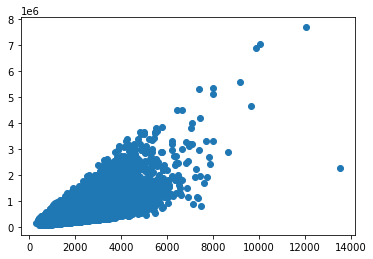

In [13]:
plt.scatter(df['sqft_living'],df['price'])

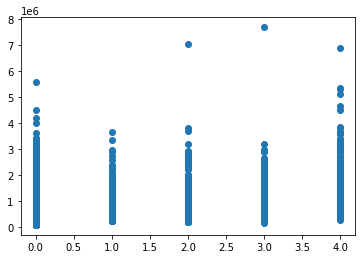

In [14]:
plt.scatter(df['view'],df['price'])

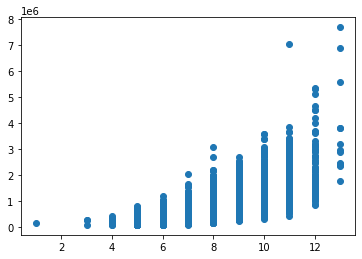

In [15]:
plt.scatter(df['grade'],df['price'])

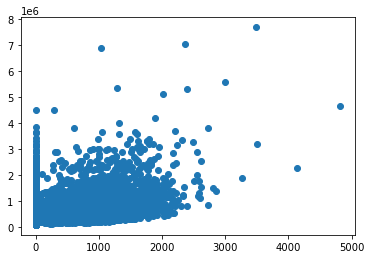

In [16]:
plt.scatter(df['sqft_basement'],df['price'])

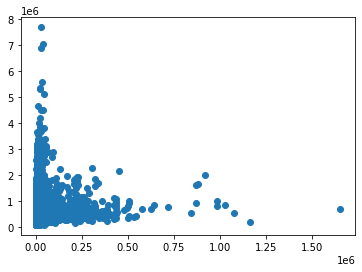

In [17]:
plt.scatter(df['sqft_lot'],df['price'])

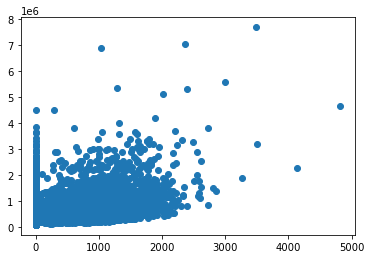

In [18]:
plt.scatter(df['sqft_basement'],df['price'])

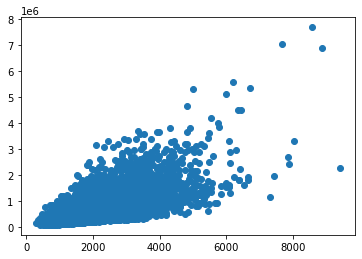

In [19]:
plt.scatter(df['sqft_above'],df['price'])

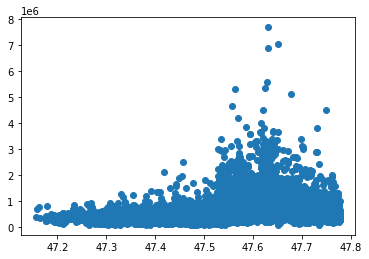

In [20]:
plt.scatter(df['lat'],df['price'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

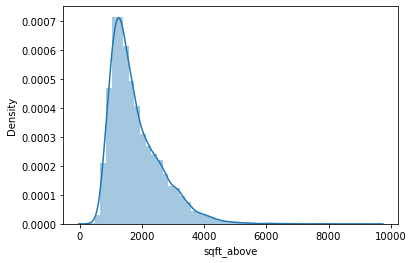

In [21]:
sns.distplot(df['sqft_above'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

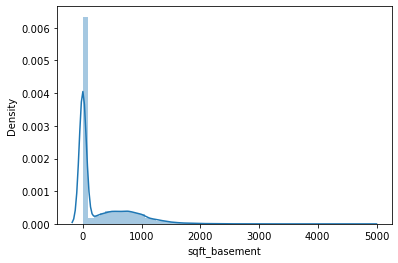

In [22]:
sns.distplot(df['sqft_basement'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

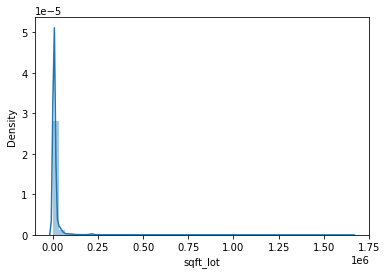

In [23]:
sns.distplot(df['sqft_lot'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view', ylabel='Density'>

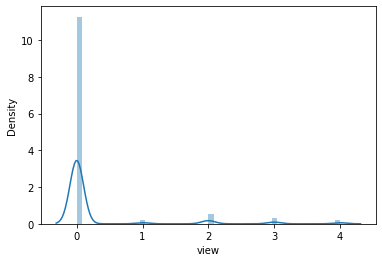

In [24]:
sns.distplot(df['view'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

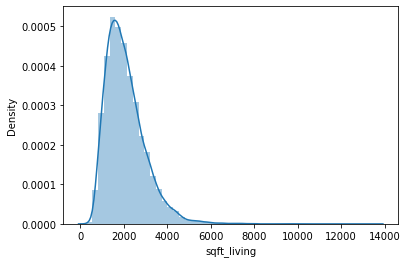

In [25]:
sns.distplot(df['sqft_living'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

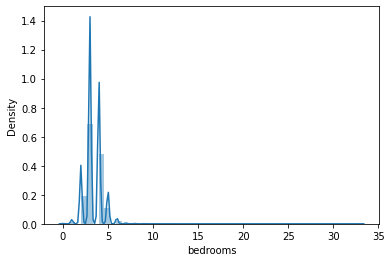

In [26]:
sns.distplot(df['bedrooms'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

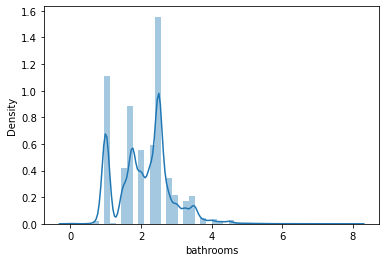

In [27]:
sns.distplot(df['bathrooms'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

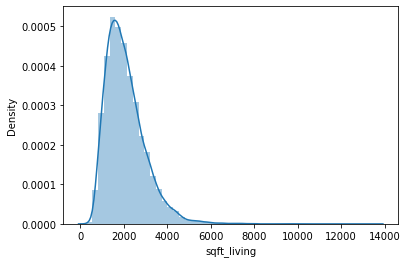

In [28]:
sns.distplot(df['sqft_living'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='floors', ylabel='Density'>

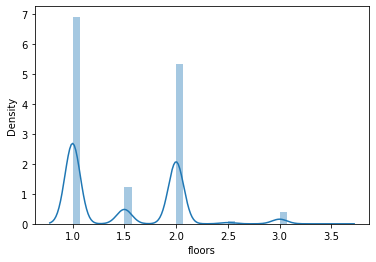

In [29]:
sns.distplot(df['floors'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

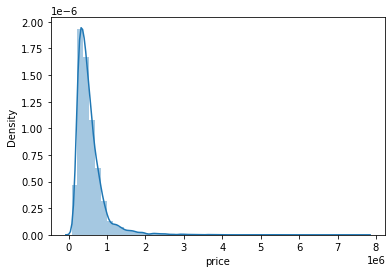

In [30]:
sns.distplot(df['price'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='floors'>

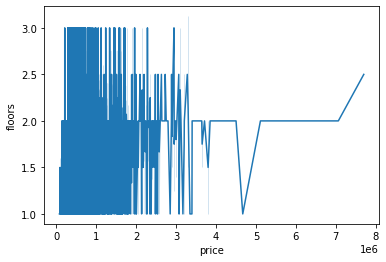

In [31]:
sns.lineplot('price', 'floors', data=df)

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

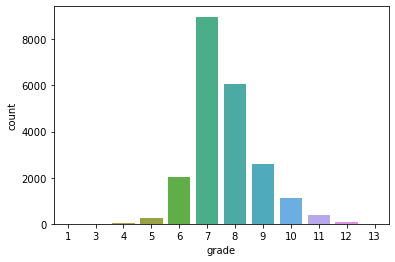

In [32]:
sns.countplot(df['grade'])

C:\Users\EGYPT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='count'>

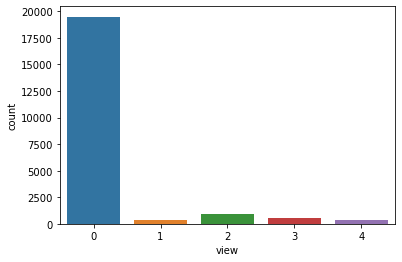

In [33]:
sns.countplot(df['view'])

# checking null on heatmap

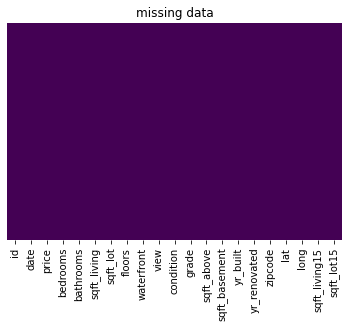

In [34]:
df.isnull().sum()
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()

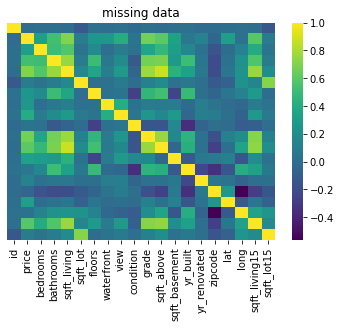

In [35]:
df.isnull().sum()
sns.heatmap(df.corr(),cmap='viridis',cbar=True,yticklabels=False)

plt.title('missing data')
plt.show()

# Correlation

In [36]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# Displaying boxplot to see outlier values

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

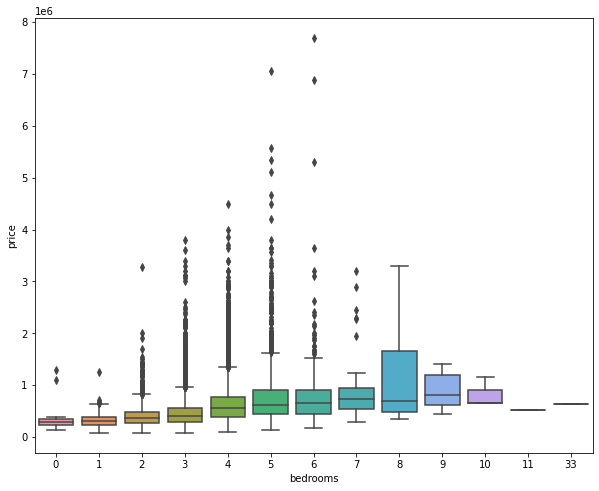

In [37]:
plt.figure(figsize=(10,8))
sns.boxplot(x='bedrooms', y='price', data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

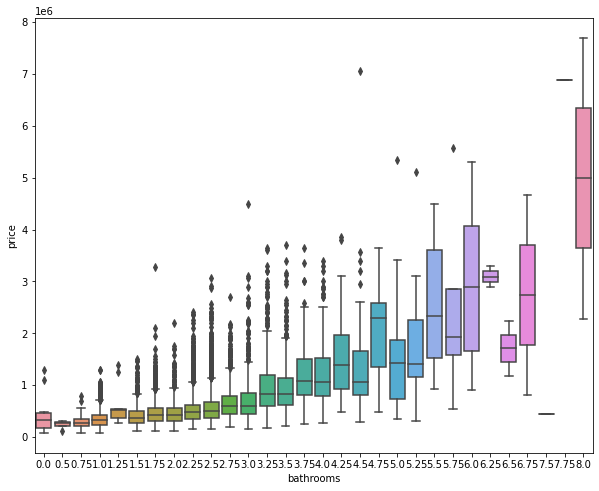

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(x='bathrooms', y='price', data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

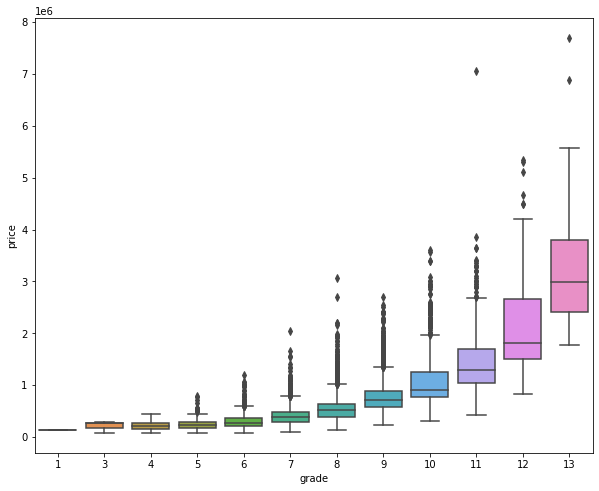

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(x='grade', y='price', data=df)

<AxesSubplot:xlabel='view', ylabel='price'>

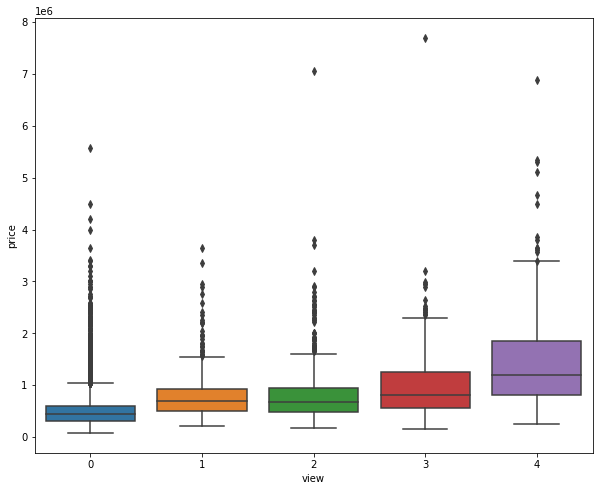

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(x='view', y='price', data=df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

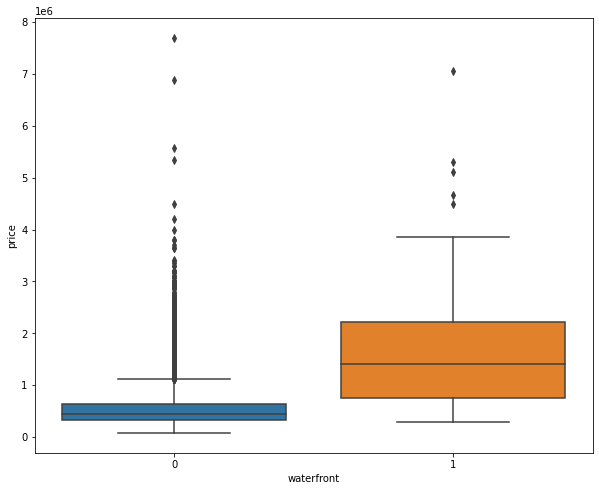

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x='waterfront', y='price', data=df)

<AxesSubplot:xlabel='floors', ylabel='price'>

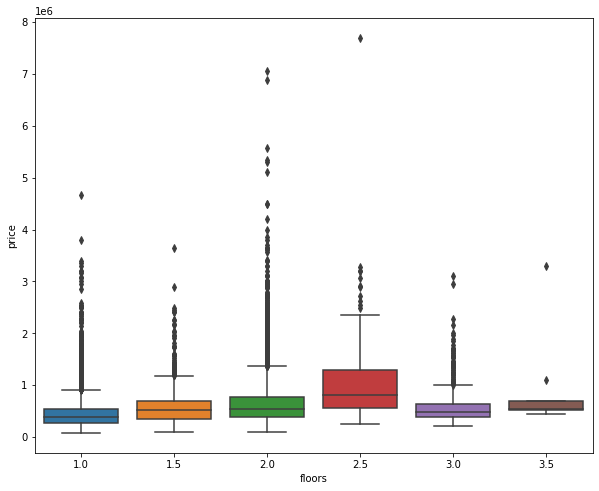

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(x='floors', y='price', data=df)

In [43]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

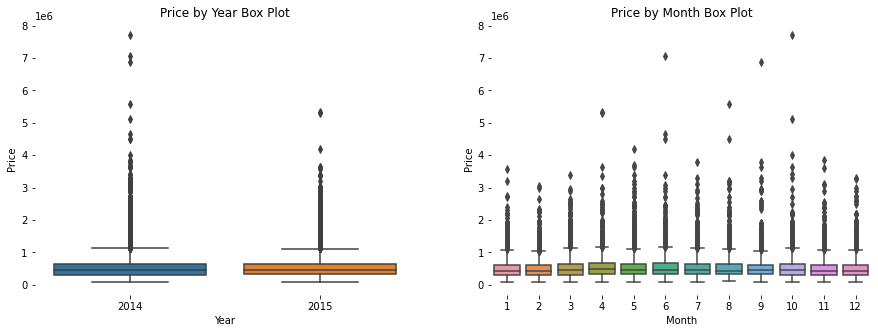

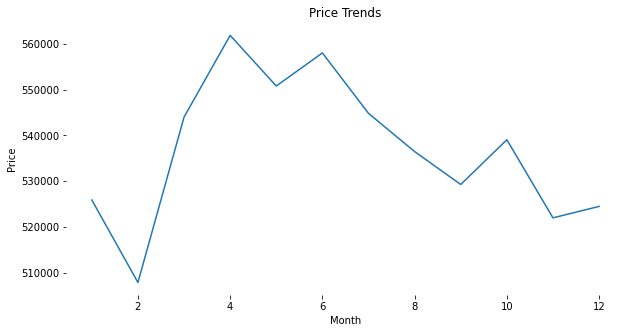

In [44]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(10,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

# handling outliers

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [46]:
df.sort_values('price',ascending=False).head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
7252,6762700020,7700000.0,6,8.00,12050,27600,2.5,0,3,4,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,10,2014
3914,9808700762,7062500.0,5,4.50,10040,37325,2.0,1,2,3,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,6,2014
9254,9208900037,6885000.0,6,7.75,9890,31374,2.0,0,4,3,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,9,2014
4411,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,0,3,...,3000,2001,0,98039,47.6289,-122.233,3560,24345,8,2014
1448,8907500070,5350000.0,5,5.00,8000,23985,2.0,0,4,3,...,1280,2009,0,98004,47.6232,-122.220,4600,21750,4,2015
1315,7558700030,5300000.0,6,6.00,7390,24829,2.0,1,4,4,...,2390,1991,0,98040,47.5631,-122.210,4320,24619,4,2015
1164,1247600105,5110800.0,5,5.25,8010,45517,2.0,1,4,3,...,2020,1999,0,98033,47.6767,-122.211,3430,26788,10,2014
8092,1924059029,4668000.0,5,6.75,9640,13068,1.0,1,4,3,...,4820,1983,2009,98040,47.5570,-122.210,3270,10454,6,2014
2626,7738500731,4500000.0,5,5.50,6640,40014,2.0,1,4,3,...,290,2004,0,98155,47.7493,-122.280,3030,23408,8,2014
8638,3835500195,4489000.0,4,3.00,6430,27517,2.0,0,0,3,...,0,2001,0,98004,47.6208,-122.219,3720,14592,6,2014


In [47]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

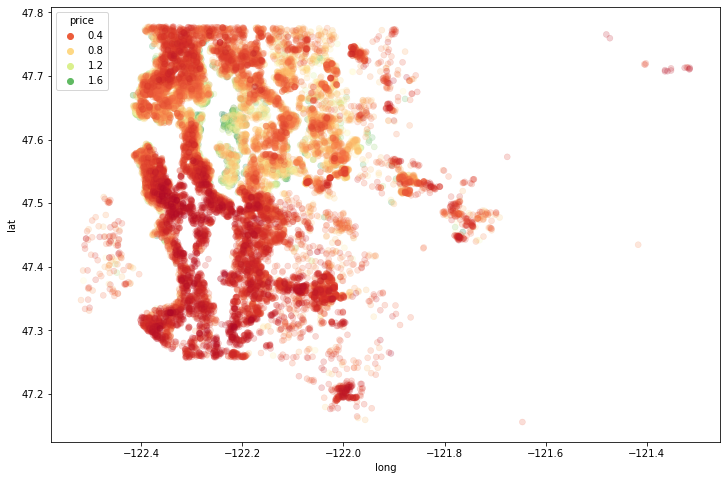

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

# Feature Engineering from Date

In [49]:
df['sqft_living'] = pd.to_datetime(df['sqft_living'])
df['bathrooms'] = df['sqft_living'].apply(lambda date:date.month)
df['bedrooms'] = df['sqft_living'].apply(lambda date:date.year)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

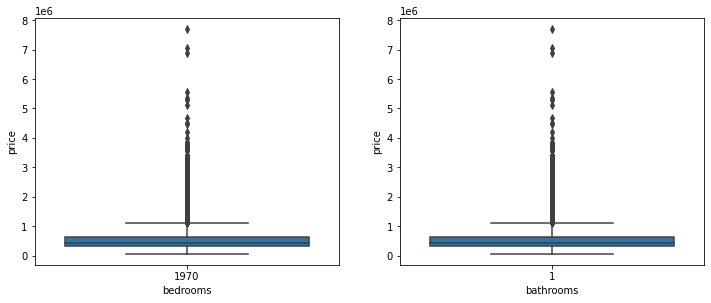

In [50]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.boxplot(x='bedrooms',y='price',data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x='bathrooms',y='price',data=df)

In [51]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [52]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [53]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,1970,1,1970-01-01 00:00:00.000001180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,1970,1,1970-01-01 00:00:00.000002570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,1970,1,1970-01-01 00:00:00.000000770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,1970,1,1970-01-01 00:00:00.000001960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,1970,1,1970-01-01 00:00:00.000001680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


# Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
les = {}
for i in (['sqft_living']) :
    les[i] = LabelEncoder()
    df[i] = les[i].fit_transform(df[i]) 
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,1970,1,109,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,1970,1,506,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,1970,1,39,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,1970,1,316,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,1970,1,238,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,1970,1,195,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21609,6600060120,400000.0,1970,1,430,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21610,1523300141,402101.0,1970,1,77,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21611,291310100,400000.0,1970,1,210,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


# Train, test splitting, and scalling 

In [56]:
X = df.drop('price', axis='columns')
y = df.price

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
5268,5100402668,1970,1,202,5510,1.0,0,0,4,7,...,500,1940,0,98115,47.6942,-122.319,1770,6380,2,2015
16909,7856560480,1970,1,264,11000,1.0,0,0,4,8,...,570,1980,0,98006,47.5574,-122.149,2310,9700,8,2014
16123,2872900010,1970,1,92,9862,1.0,0,0,3,8,...,0,1987,0,98074,47.6256,-122.036,1710,9862,4,2015
12181,3216900070,1970,1,399,7079,2.0,0,0,3,8,...,0,1993,0,98031,47.4206,-122.183,1970,7000,6,2014
12617,976000790,1970,1,271,4763,2.0,0,0,3,7,...,560,1985,0,98119,47.6460,-122.362,1790,4763,10,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2322069010,1970,1,777,94089,2.0,0,0,3,10,...,0,1998,0,98038,47.3800,-122.011,2240,64468,10,2014
19648,2114700368,1970,1,156,1262,2.0,0,0,3,8,...,240,2008,0,98106,47.5342,-122.349,1060,1524,11,2014
9845,5469501200,1970,1,441,14950,1.0,0,0,4,9,...,0,1978,0,98042,47.3856,-122.158,2720,14388,8,2014
10799,3751602797,1970,1,442,76665,2.0,0,0,4,8,...,0,1978,0,98001,47.2831,-122.279,2110,19334,7,2014


In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(17290, 21)
(4323, 21)


# Model builiding

In [60]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

### Multiple Linear Regression Model

In [61]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
yhat_test = lm.predict(X_test)
yhat_test_df = pd.DataFrame(yhat_test, columns=['predicted_price'])

In [63]:
print(yhat_test)
print(yhat_test_df)

[ 431528.96485163 1652476.41512177  536709.21439559 ...  377832.0177377
  225976.03977199  431178.26121095]
      predicted_price
0        4.315290e+05
1        1.652476e+06
2        5.367092e+05
3        5.808212e+05
4        9.380810e+05
...               ...
4318     8.877250e+05
4319     4.967527e+05
4320     3.778320e+05
4321     2.259760e+05
4322     4.311783e+05

[4323 rows x 1 columns]


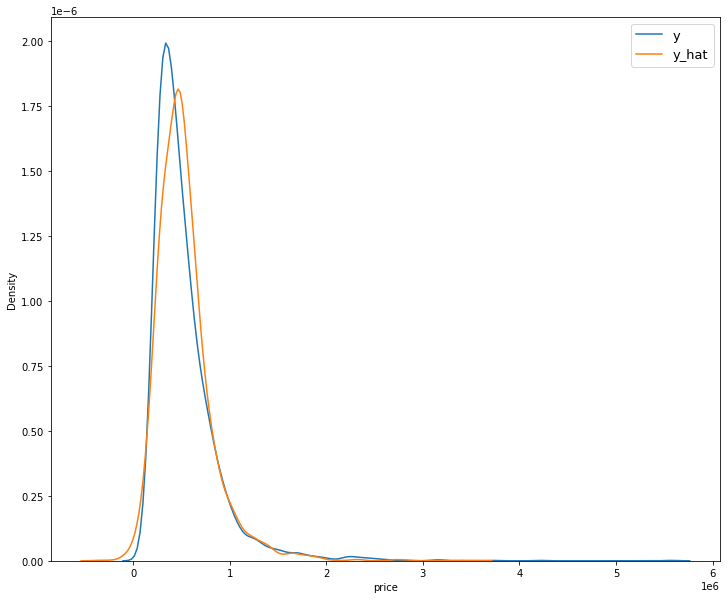

In [64]:
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test)
ax = sns.kdeplot(yhat_test_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);


In [65]:
lm.score(X_test, y_test)

0.7150042305325359

In [66]:
error = abs(round(lm.score(X_test, y_test) - lm.score(X_train, y_train), 4))
error

0.0151

In [67]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  121890.27826052066
MSE:  37439666050.48157
RMSE:  193493.32301265997
R2 Square:  0.7300727563815294
=========Testing Result=======
MAE:  118503.82841988269
MSE:  33892913636.554295
RMSE:  184100.2814678845
R2 Square:  0.7150042305325359


# GradientBoostingRegressor

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [71]:
pipe_gradient_info = [('Normalize', StandardScaler()), ('Polynomial Features', PolynomialFeatures(include_bias=False)), ('regressor', GradientBoostingRegressor(n_estimators=90))]
pipe_gradient = Pipeline(pipe_gradient_info)

In [72]:
model_gb = pipe_gradient.fit(X_train, (y_train))
print (model_gb)

Pipeline(steps=[('Normalize', StandardScaler()),
                ('Polynomial Features', PolynomialFeatures(include_bias=False)),
                ('regressor', GradientBoostingRegressor(n_estimators=90))])


In [73]:
yhat_test_gb = model_gb.predict(X_test)

In [74]:
yhat_train_gb = model_gb.predict(X_train)

In [75]:
yhat_test_gb_df = pd.DataFrame(yhat_test_gb, columns=['predicted_price'])

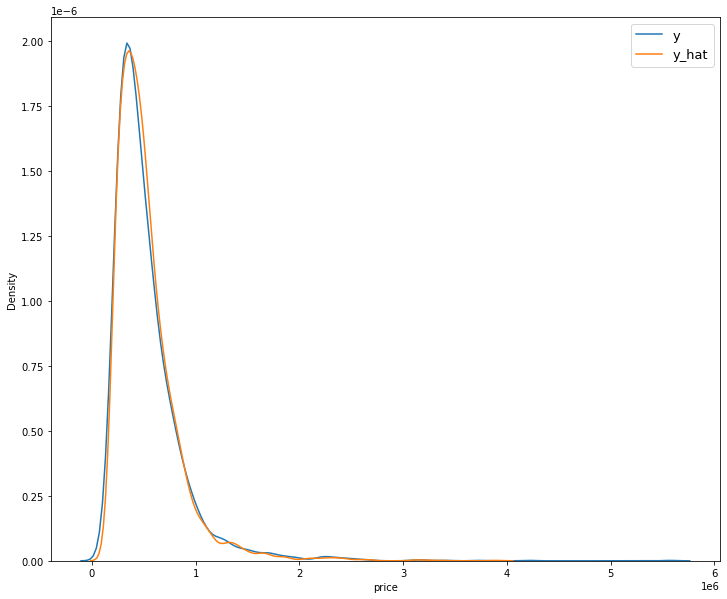

In [76]:
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test)
ax = sns.kdeplot(yhat_test_gb_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);

In [77]:
model_gb.score(X_test, y_test)

0.8743224480048659

In [78]:
error = abs(round(model_gb.score(X_test, y_test) - model_gb.score(X_train, y_train), 4))
error

0.0397

In [79]:
print_evaluate(y_train, yhat_train_gb, train=True)
print_evaluate(y_test, yhat_test_gb, train=False)

========Training Result=======
MAE:  70257.55175885605
MSE:  11929160771.288027
RMSE:  109220.69754075016
R2 Square:  0.913994812845454
=========Testing Result=======
MAE:  72221.87442295319
MSE:  14946111038.012894
RMSE:  122254.28842381315
R2 Square:  0.8743224480048659


### Polynomial Regression and Normalization

In [80]:
pipe_info = [('Normalize', StandardScaler()), ('Polynomial Features', PolynomialFeatures(include_bias=False)), ('Linear Model', LinearRegression())]
pipe = Pipeline(pipe_info)

In [81]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Normalize', StandardScaler()),
                ('Polynomial Features', PolynomialFeatures(include_bias=False)),
                ('Linear Model', LinearRegression())])

In [82]:
yhat_test_pipe = pipe.predict(X_test)
yhat_test_pipe_df = pd.DataFrame(yhat_test_pipe, columns=['predicted_price'])

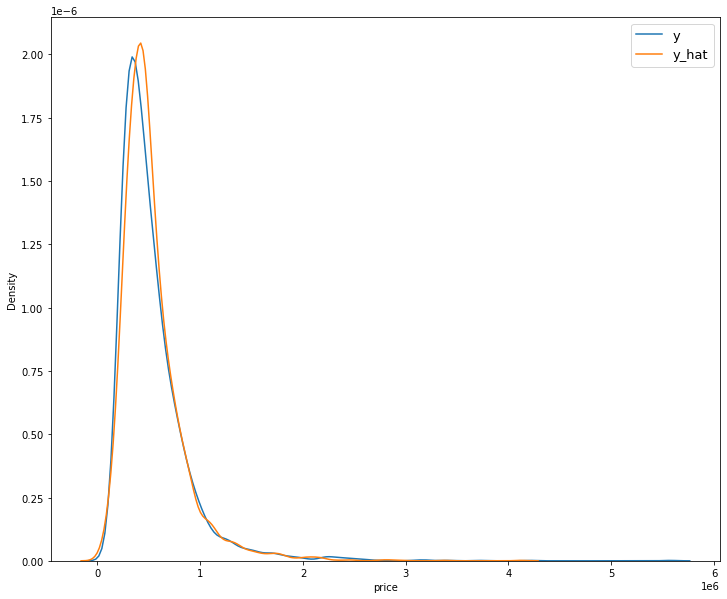

In [83]:
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test)
ax = sns.kdeplot(yhat_test_pipe_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);

In [84]:
pipe.score(X_test, y_test)

0.8077410668525663

In [85]:
error = abs(round(pipe.score(X_test, y_test) - pipe.score(X_train, y_train), 4))
error

0.0325

In [86]:
ytrain_pipe = pipe.predict(X_train)

print_evaluate(y_train, ytrain_pipe, train=True)
print_evaluate(y_test, yhat_test_pipe, train=False)

========Training Result=======
MAE:  97849.46020064435
MSE:  22165691754.288868
RMSE:  148881.4688075345
R2 Square:  0.8401929101059677
=========Testing Result=======
MAE:  96475.37932043629
MSE:  22864253140.31178
RMSE:  151209.30242651005
R2 Square:  0.8077410668525663


### Ridge Regression

In [87]:
pipe_info_ridge = [('Normalize', StandardScaler()), ('Polynomial Features', PolynomialFeatures(include_bias=False)), ('Regression', Ridge())]
ridge_pipe = Pipeline(pipe_info_ridge)

In [88]:
ridge_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Normalize', 'Polynomial Features', 'Regression', 'Normalize__copy', 'Normalize__with_mean', 'Normalize__with_std', 'Polynomial Features__degree', 'Polynomial Features__include_bias', 'Polynomial Features__interaction_only', 'Polynomial Features__order', 'Regression__alpha', 'Regression__copy_X', 'Regression__fit_intercept', 'Regression__max_iter', 'Regression__normalize', 'Regression__random_state', 'Regression__solver', 'Regression__tol'])

In [89]:
hyper_params_dict = {'Regression__alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]}

In [90]:
grid = GridSearchCV(estimator=ridge_pipe, param_grid=hyper_params_dict, scoring='r2', n_jobs=-1, cv=4)

In [91]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Normalize', StandardScaler()),
                                       ('Polynomial Features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('Regression', Ridge())]),
             n_jobs=-1,
             param_grid={'Regression__alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1,
                                               10, 100, 1000, 10000]},
             scoring='r2')

In [92]:
grid.best_params_

{'Regression__alpha': 0.1}

In [93]:
best_ridge = grid.best_estimator_
best_ridge

Pipeline(steps=[('Normalize', StandardScaler()),
                ('Polynomial Features', PolynomialFeatures(include_bias=False)),
                ('Regression', Ridge(alpha=0.1))])

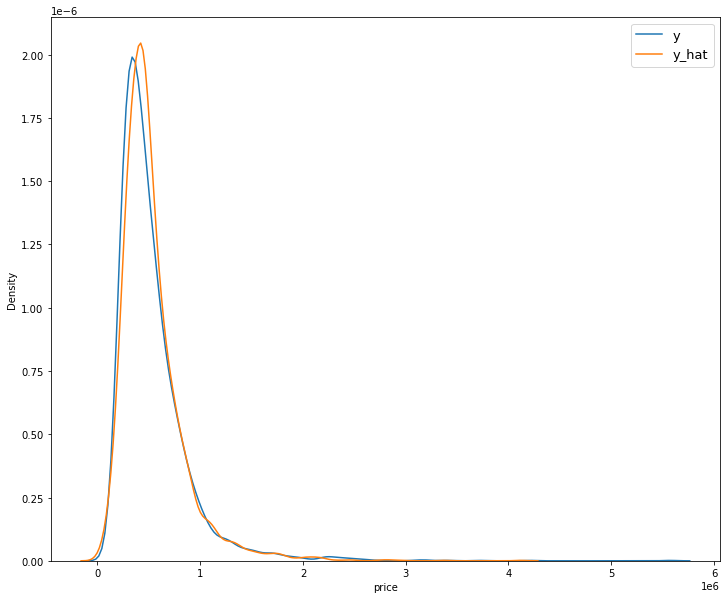

In [94]:
yhat_ridge = best_ridge.predict(X_test)
ytrain_ridge = best_ridge.predict(X_train)
yhat_ridge_df = pd.DataFrame(yhat_ridge, columns=['predicted_price'])
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test)
ax = sns.kdeplot(yhat_ridge_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);

In [95]:
grid.best_score_

0.8205988267039069

In [98]:
error = abs(round(best_ridge.score(X_test, y_test) - best_ridge.score(X_train, y_train), 4))
error

0.0325

In [99]:
print_evaluate(y_train, ytrain_ridge, train=True)
print_evaluate(y_test, yhat_ridge, train=False)

========Training Result=======
MAE:  97845.94796693778
MSE:  22165985697.706074
RMSE:  148882.45597687483
R2 Square:  0.8401907908740205
=========Testing Result=======
MAE:  96472.85995533137
MSE:  22864783568.974365
RMSE:  151211.056371465
R2 Square:  0.8077366066303953
